# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.
- The company wishes to clarify whether there is any increase in sales after
     stepping into digital marketing.
- The company needs to check whether there is any dependency between the
   features “Region” and “Manager”

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv("Sales_add.csv")

In [3]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [17]:
data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

**There is no null values**

### 1.Testing for increase in sales( Using Paired t-test)


Here the company wishes to clarify whether there is any increase in sales after stepping into digital marketing.
- **Hypothesis**
- H0: There is no increase in sales after digital marketing

- H1: There is increase in sales after digital marketing

In [7]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [8]:
from scipy import stats
stats.ttest_rel(data['Sales_After_digital_add(in $)'], data['Sales_before_digital_add(in $)'],alternative='greater')

Ttest_relResult(statistic=12.09070525287017, pvalue=3.168333502287889e-11)

ie; calulated t statistic value is 12.091 and p value is 0.

**Since p value < 0.05, we reject H0. ie; We can conclude that there is an increase in the sales after the digital marketing**

### visualization

In [9]:
## grouping based on regions and their total sum.
df2=data.groupby('Region',as_index=False).sum()

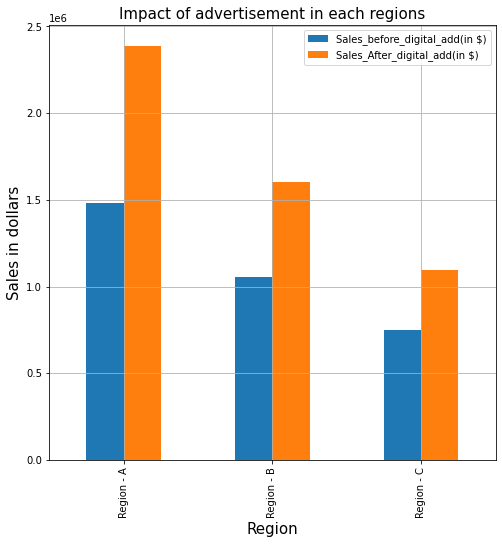

In [16]:
## comparing sales before and after advertisement
df2.plot(x="Region",y=["Sales_before_digital_add(in $)","Sales_After_digital_add(in $)"],kind='bar',figsize=(8,8))
plt.title("Impact of advertisement in each regions",fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Sales in dollars",fontsize=15)
plt.grid()
plt.show()

**It is evident from the above graph that there is a substantial increase in sales in all regions.**

### Testing for dependency in features (Chi-sqaure test)
Here the company needs to check whether there is any dependancy between "Region" and "Manager"


**hypothesis**
- H0: There is no dependancy between Region & Manager

- H1: There is dependancy between Region & Manager



In [11]:
data['Region'].value_counts() 

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

In [12]:
data['Manager'].value_counts() 

Manager - A    9
Manager - B    7
Manager - C    6
Name: Manager, dtype: int64

In [13]:
crosstab=pd.crosstab(data.Region,data.Manager) # observed frequencies
crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [14]:
import scipy.stats as stats
stats.chi2_contingency(crosstab)

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

chisquare_value = 3.0506, p_value = 0.5494, degrees of freedom = 4, array gives the expected frequencies

**Here p-value > 0.05 which implies we accept the null hypothesis ,that is "There is no depandancy between the 'Region' & 'Manager'"**



In [ ]:
#submitted by Shiffa SaLeem